<a href="https://colab.research.google.com/github/Zulfa-Varvani/ML-things/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.drop(['Unnamed: 32'], axis=1)

In [ ]:
df['diagnosis']= [1 if x == 'M' else 0 for x in df.diagnosis]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.corr().sort_values('diagnosis', ascending=False)['diagnosis']

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

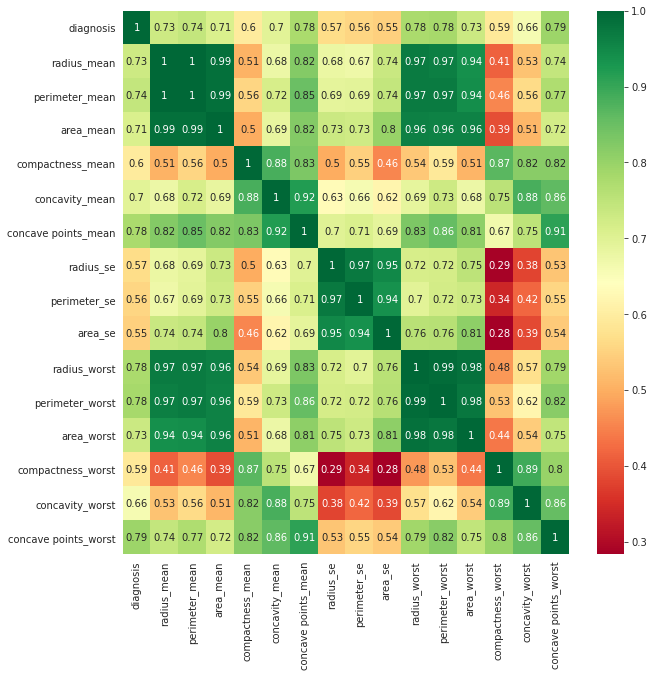

In [ ]:
corr = df.corr()
top_corr = corr.index[abs(corr['diagnosis'])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr].corr(),annot=True,cmap='RdYlGn')

In [ ]:
#highest correlation: concave points_worst,perimeter_worst, concave points_mean, radius_worst, perimeter_mean, area_worst, radius_mean, area_mean
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

x = df.drop(['id','diagnosis', 'smoothness_se', 'fractal_dimension_mean', 'texture_se', 'symmetry_se', 'fractal_dimension_se', 'concavity_se',
              'compactness_se', 'fractal_dimension_worst', 'symmetry_mean', 'smoothness_mean', 'concave points_se', 'texture_mean', 'symmetry_worst',
             'smoothness_worst', 'texture_worst', 'area_se', 'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean', 'concavity_worst',
             'concavity_mean'], axis=1)
y=df.diagnosis

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
x_train.head()

,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,10.05,64.41,310.8,0.01775,11.16,71.98,384.0,0.06499
1,10.80,68.79,359.9,0.01404,12.76,83.69,489.5,0.07485
2,16.14,104.30,800.0,0.04528,17.71,115.90,947.9,0.11290
3,12.18,77.79,451.1,0.02941,12.83,82.14,495.2,0.05882
4,12.25,78.18,466.5,0.01261,14.17,92.74,622.9,0.06335


In [ ]:
knn = KNeighborsClassifier()
nb = GaussianNB()
svm = SVC()
dt = DecisionTreeClassifier()
lr = LogisticRegression(solver='lbfgs', max_iter=400)
rf=RandomForestClassifier()
en = VotingClassifier(estimators=[('KNN', knn), ('NB', nb), ('SVM', svm),('DT', dt), ('LR', lr),('RF', rf)], voting='hard')

en.fit(x_train,y_train)
pred=en.predict(x_test)

print('Precision: ', np.round(metrics.precision_score(y_test, pred)*100,2))
print('Accuracy: ', np.round(metrics.accuracy_score(y_test, pred)*100,2))
print('Recall: ', np.round(metrics.recall_score(y_test, pred)*100,2))
print('F1 score: ', np.round(metrics.f1_score(y_test, pred)*100,2))
print('AUC: ', np.round(metrics.roc_auc_score(y_test, pred)*100,2))

Precision:  97.83
Accuracy:  97.37
Recall:  95.74
F1 score:  96.77
AUC:  97.13
